In [56]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [14]:
dataset = pd.read_csv('WFH_WFO_dataset.csv')

# Encode categorical variables
categorical_columns = ['Gender', 'Occupation', 'Same_ofiice_home_location', 
                       'RM_save_money', 'RM_quality_time', 'RM_better_sleep', 
                       'calmer_stressed', 'digital_connect_sufficient', 
                       'RM_job_opportunities']

dataset_encoded = dataset.copy()

for col in categorical_columns:
    dataset_encoded[col] = LabelEncoder().fit_transform(dataset_encoded[col])


In [42]:
# Feature-target split
X = dataset_encoded.drop(columns=['ID', 'Name', 'Target'])
y = dataset_encoded['Target']

# Convert the 'kids' column into numeric values
X['kids'] = LabelEncoder().fit_transform(X['kids'])

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Training the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Model Evaluation
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report_output)

Accuracy: 0.9841269841269841

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        37
           1       1.00      0.96      0.98        26

    accuracy                           0.98        63
   macro avg       0.99      0.98      0.98        63
weighted avg       0.98      0.98      0.98        63



In [60]:
# Create a DataFrame for predictions and actual values
results_df = pd.DataFrame({
    'Actual': y_test.reset_index(drop=True),
    'Predicted': y_pred
})

# Identify misclassified samples
misclassified_indices = results_df[results_df['Actual'] != results_df['Predicted']].index
misclassified_samples = dataset.iloc[misclassified_indices]

# Display the misclassified samples
print("\nMisclassified Samples:\n", misclassified_samples)


Misclassified Samples:
     ID         Name  Age  Occupation  Gender Same_ofiice_home_location kids  \
19  20         Alok   25  Marketing     Male                       Yes   No   
27  28  Sathyaraman   26          HR    Male                       Yes   No   
30  31        Lekha   25  Marketing   Female                       Yes   No   
42  43       Vihaan   27          HR    Male                        No   No   
58  59          Amy   21       Tutor    Male                        No   No   

   RM_save_money RM_quality_time RM_better_sleep calmer_stressed  \
19           Yes              No              No        STRESSED   
27           Yes             Yes              No        STRESSED   
30           Yes             Yes             Yes          CALMER   
42            No              No             Yes        STRESSED   
58            No              No              No          CALMER   

    RM_professional_growth  RM_lazy  RM_productive digital_connect_sufficient  \
19        

In [50]:
# Train Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42, max_depth=5)  # Adjust max_depth as needed
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [54]:
y_pred = decision_tree.predict(X_test)

# Accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%\n")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Feature Importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': decision_tree.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:\n", feature_importances)

Accuracy: 92.06%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.86      0.93        37
           1       0.84      1.00      0.91        26

    accuracy                           0.92        63
   macro avg       0.92      0.93      0.92        63
weighted avg       0.93      0.92      0.92        63

Feature Importances:
                         Feature  Importance
8               calmer_stressed    0.414836
14         RM_improved_skillset    0.118024
15         RM_job_opportunities    0.094365
1                    Occupation    0.090368
12   digital_connect_sufficient    0.069396
2                        Gender    0.058287
7               RM_better_sleep    0.055628
9        RM_professional_growth    0.053761
10                      RM_lazy    0.045334
0                           Age    0.000000
3     Same_ofiice_home_location    0.000000
4                          kids    0.000000
5                 RM_save_money    0.

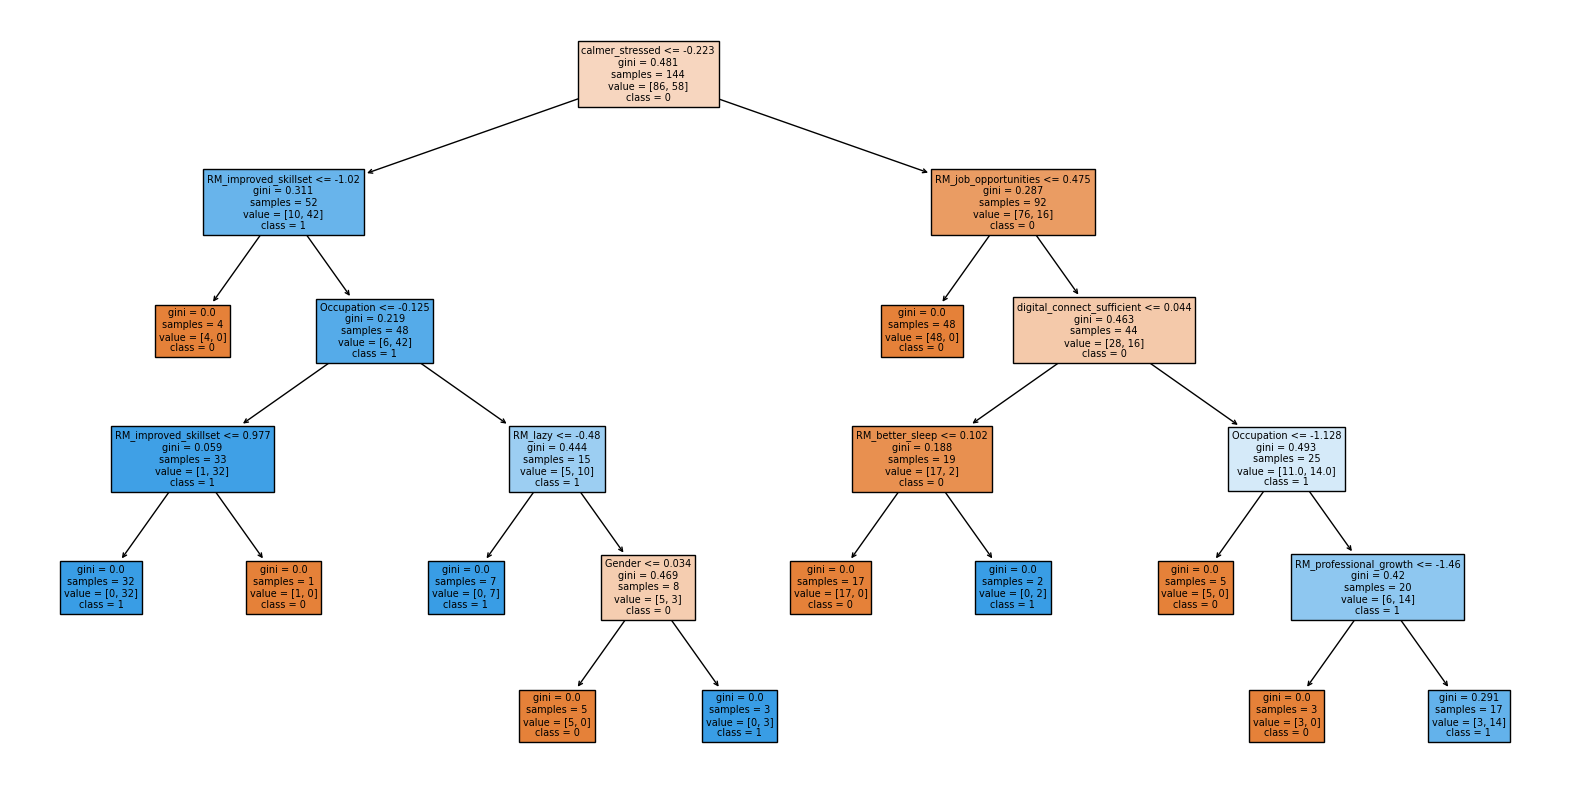

In [58]:
plt.figure(figsize=(20, 10))
plot_tree(decision_tree, feature_names=X.columns, class_names=['0', '1'], filled=True)
plt.show()